In [34]:
import cv2
import numpy as np  
import matplotlib.pyplot as plt 

from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression   


## Yêu cầu bào toán
- Sử dụng python và opencv
- Tạo ảnh trắng size 400*200
- vẽ hình vuông size 20*20 ở chính giữa 
- Chứng minh bản thân đúng

### 1.Khởi tạo tham số

In [35]:
# Khoi tao shape cua image va rec (bang dictionary)
'''
    Arguments:  
        width: chieu rong cua anh (pixels) 
        height: chieu cao cua anh (pixels)
        channels: so kenh mau cua anh (1 kenh cho anh xam, 3 kenh cho anh mau RGB)
        color: mau nen cua anh (RGB)    
'''
image_attributes = {
                'width': 200, 
                'height': 400, 
                'channels': 3, 
                'color': [255, 255, 255]
               } # white color in BGR   

# Khoi tao shape cua rectangle (bang dictionary) 
'''
    Arguments:  
        width: chieu rong cua hinh chu nhat (pixels) 
        height: chieu cao cua hinh chu nhat (pixels)
        channels: so kenh mau cua hinh chu nhat (1 kenh cho anh xam, 3 kenh cho anh mau RGB)   
        color: mau cua hinh chu nhat (RGB)  
''' 
rec_attributes = { 
                    'width': 20,    
                    'height': 20, 
                    'channels': 3, 
                    'color': [0, 255, 0] # green theo yeu cau cua bai toan
                 }

### 2. Xây dựng Module tạo ảnh

In [ ]:
class Image_Render: 
    def __init__(self, image_attribute: dict) :   
        self.width = image_attribute['width']  
        self.height = image_attribute['height'] 
        self.channels = image_attribute['channels'] 
        self.color = image_attribute['color']     
        
    def image_render_by_loop(self): 
        # Tạo ảnh trắng
        image = np.zeros((self.height, self.width, self.channels), dtype=np.uint8) 
        for i in range(self.height): 
            for j in range(self.width): 
                image[i, j] = self.color  
        return image

    def image_render_by_numpy(self):    
        return np.full((self.height, self.width, self.channels), self.color, dtype=np.uint8)    

    

In [37]:
image = Image_Render(image_attributes).image_render_by_numpy()
rec = Image_Render(rec_attributes).image_render_by_numpy()  

In [38]:
image.shape, rec.shape

((400, 200, 3), (20, 20, 3))

### 3. Xác định tâm của ảnh

##### 3.1 Giao của 2 đường chéo 

In [83]:
# Khởi tạo giá trị đầu vào X, y

step = int(image_attributes['height'] // image_attributes['width'])

x = np.arange(0, image_attributes['width'] , 1).reshape(-1, 1)  # X shape (200, 1)   
y = np.arange(0, image_attributes['height'], step).reshape(-1, 1)  # y shape (200, 1)  

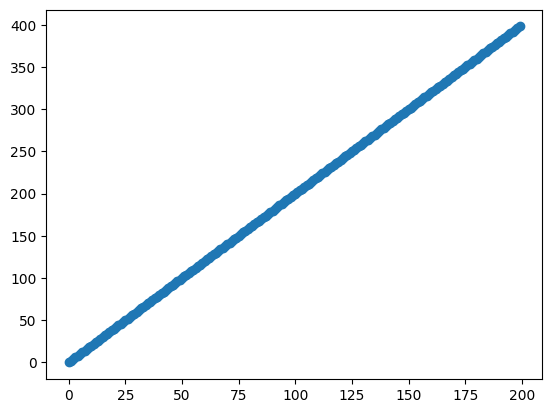

In [84]:
plt.scatter(x, y)
plt.show()  

In [85]:
model = LinearRegression().fit(x, y)    
model.coef_, model.intercept_  # coef_ = [[2.]], intercept_ = [-0.]

(array([[2.]]), array([0.]))

In [86]:
# 2. Định nghĩa hàm log-likelihood
def log_likelihood(params, X, y):
    """
    Hàm log-likelihood cho mô hình hồi quy tuyến tính.
    params[0] là beta_0 (hệ số chặn)
    params[1] là beta_1 (hệ số góc)
    params[2] là sigma (độ lệch chuẩn của sai số)
    """
    beta_0, beta_1, sigma = params
    
    # Tính giá trị dự đoán từ mô hình
    y_pred = beta_0 + beta_1 * X # flatten() để chuyển X từ (n, 1) sang (n,)  
    
    # Tính phần còn lại (sai số)
    residuals = y - y_pred
    
    # Tính log-likelihood
    # Hàm PDF của phân phối chuẩn: L(theta) = tích của PDF(yi | xi, theta)
    # Log-likelihood: LL(theta) = tổng của ln(PDF(yi | xi, theta))
    # ln(PDF) = -0.5 * ln(2*pi) - ln(sigma) - 0.5 * ((y - y_pred) / sigma)^2
    n = len(y)
    log_L = -n/2 * np.log(2 * np.pi) - n * np.log(sigma) - (1/(2 * sigma**2)) * np.sum(residuals**2)
    
    # SciPy's `minimize` tìm cực tiểu, nên ta phải tối thiểu hóa log-likelihood âm
    return -log_L

# 3. Ước lượng các tham số bằng cách tối thiểu hóa hàm log-likelihood âm
# Đặt giá trị khởi tạo cho các tham số (thường là một phỏng đoán hợp lý)
initial_params = [0, 0, 1] 

# Sử dụng minimize của SciPy để tìm cực tiểu của hàm log-likelihood âm
# Tham số bounds được sử dụng để đảm bảo sigma luôn dương
bounds = [(None, None), (None, None), (0.01, None)]
result = minimize(log_likelihood, initial_params, args=(x, y), bounds=bounds)

# 4. Hiển thị kết quả ước lượng
estimated_beta_0, estimated_beta_1, estimated_sigma = result.x

print(f"Tham số ước lượng: beta_0 = {estimated_beta_0:.4f}")
print(f"Tham số ước lượng: beta_1 = {estimated_beta_1:.4f}")

Tham số ước lượng: beta_0 = 0.0000
Tham số ước lượng: beta_1 = 2.0000


In [87]:
y_reverse = np.flip(y)

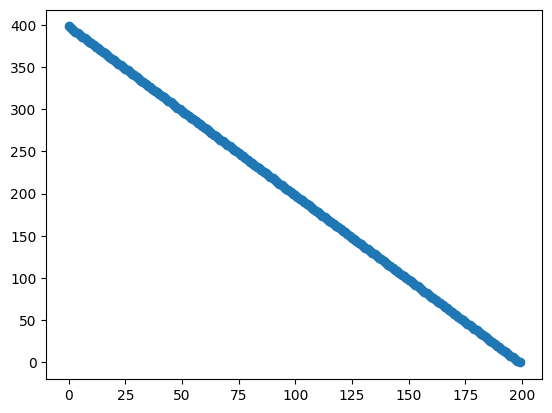

In [88]:
plt.scatter(x, y_reverse)
plt.show()  

In [89]:
model = LinearRegression().fit(x, y_reverse)    
model.coef_, model.intercept_  # coef_ = [[2.]], intercept_ = [-0.]

(array([[-2.]]), array([398.]))

In [90]:
result = minimize(log_likelihood, initial_params, args=(x, y_reverse), bounds=bounds)

# 4. Hiển thị kết quả ước lượng
estimated_beta_0, estimated_beta_1, estimated_sigma = result.x

print(f"Tham số ước lượng: beta_0 = {estimated_beta_0:.4f}")
print(f"Tham số ước lượng: beta_1 = {estimated_beta_1:.4f}")

Tham số ước lượng: beta_0 = 398.0000
Tham số ước lượng: beta_1 = -2.0000


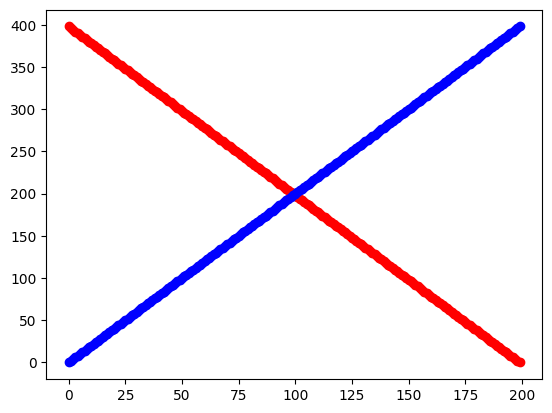

In [91]:
plt.scatter(x, y_reverse, color='red')
plt.scatter(x, y, color='blue')
plt.show()  

***Tọa độ trung tâm***

Phương trình giao của 2 đoạn thẳng trong không gian Oxy
$$2 * x = -2 * x + 398$$
$$x = 99.5, y = 198$$

Ảnh là một biểu diễn của ma trận pixel có dạng **m*n**

Vị trí của 1 pixel có dạng 
$$A[i, j]
\begin{cases}
i, & \{ i \in \mathbb{N} |  i: 0  \rightarrow n \} \\
j, & \{ i \in \mathbb{N} |  j: 0  \rightarrow m \}
\end{cases}
$$

Làm tròn x
$$ x \in [99, 100]
\begin{cases}
y = 198, & \text{if } x = 99 \\
y = 200, & \text{if } x = 100
\end{cases}
$$

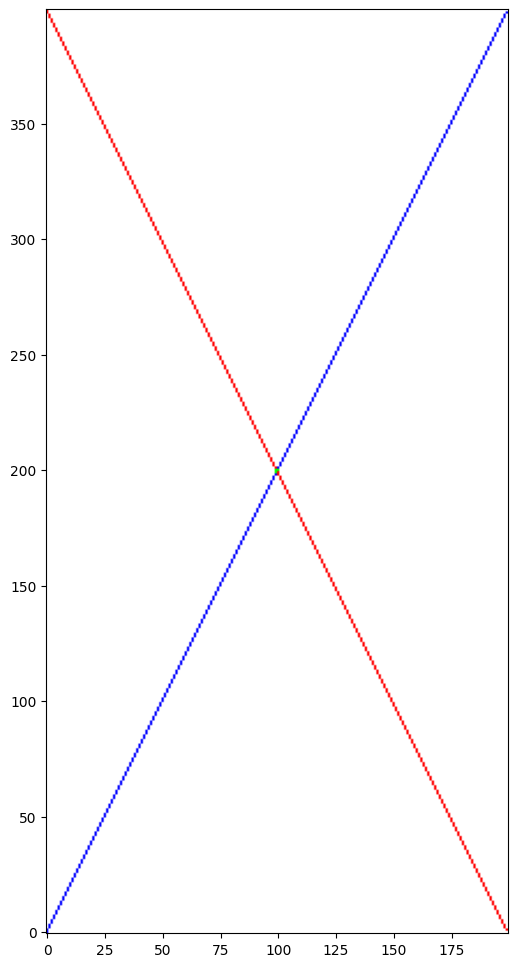

In [ ]:
image_temp = image.copy()
cv2.line(image_temp, (0, 0), (image_attributes['width'], image_attributes['height']), (255, 0, 0), 1) # blue line  
cv2.line(image_temp, (0, image_attributes['height']), (image_attributes['width'], 0), (0, 0, 255), 1) # red line  
image_temp[199, 99]=[0, 255, 0]   
image_temp[200, 100]=[0, 255, 0]  
image_temp[200, 99]=[0, 255, 0]  2-

plt.figure(figsize=(6, 12))
plt.imshow(cv2.cvtColor(image_temp, cv2.COLOR_BGR2RGB), origin='lower')
